In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load and clean dataset
df = pd.read_csv("data/machine failure.csv")
df = df.rename(columns={
    'Air temperature [K]': 'Air_temperature_K',
    'Process temperature [K]': 'Process_temperature_K',
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]': 'Tool_wear_min'
})


In [ ]:
# Encode and scale features, prepare target
X, y, scaler = apply_feature_engineering(df)
X.head()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the XGBoost model
model = train_xgb_model(X_train, y_train)


       Machine Failure Prediction Dashboard       

Model Performance (XGBoost):
- Accuracy:  0.980
- Precision: 0.672
- Recall:    0.705
- F1-Score:  0.688
- AUC:       0.972

Displaying Model Performance Chart...


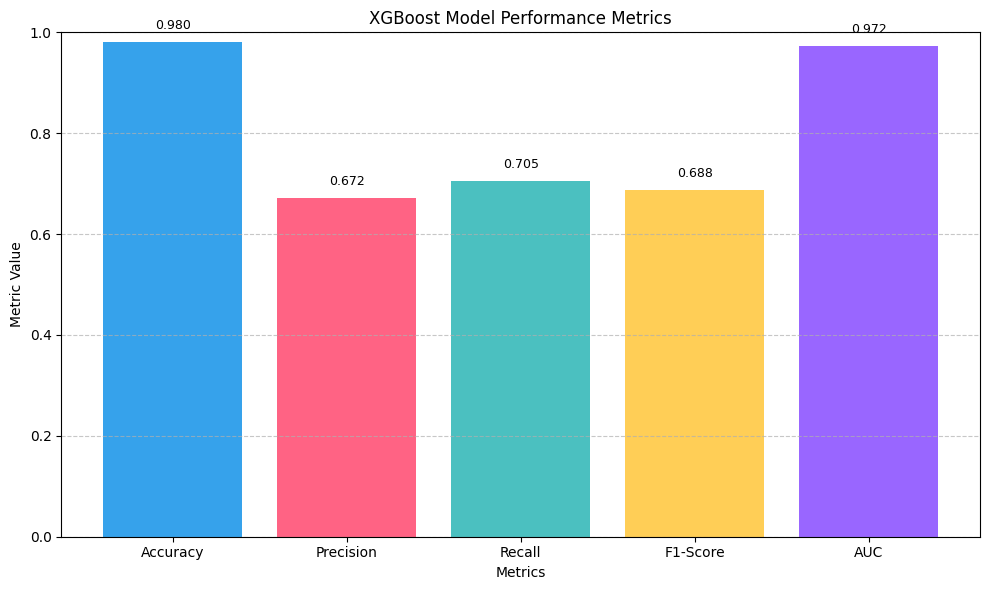


Business Impact:
- Prevented Failures: $2,050,000
- Maintenance Costs:  $275,000
- False Alarm Costs:  $14,000
- Missed Failure Costs: $1,000,000
- Net Savings:        $761,000
- Annual Savings:     $3,805,000
- ROI:                7510.0%

Enter Machine Parameters:

Prediction Results:
- Failure Probability: 0.12%
- Prediction: No Failure

Top Features to Monitor:
1. Torque (Nm)
2. Tool wear (min)
3. Rotational speed (rpm)
4. Air temperature (K)
5. Process temperature (K)

Recommendations:
1. Deploy XGBoost model (AUC: 0.972)
2. Use threshold: 0.7
3. Implement two-tier alert system
4. Retrain model quarterly
5. Monitor real-time data

Run again for another prediction.


In [ ]:
# Evaluate on test data
metrics = evaluate_model(model, X_test, y_test)
print(metrics)


In [ ]:
# Example: Predict using user-supplied values

new_params = {
    "Air_temperature_K": 298.1,
    "Process_temperature_K": 308.6,
    "Rotational_speed_rpm": 1551,
    "Torque_Nm": 42.8,
    "Tool_wear_min": 0,
    "Type": "L"
}

# Get prediction and probability
prediction, probability = get_prediction(model, scaler, new_params)
print(f"Prediction: {prediction}, Failure Probability: {probability:.2%}")
